In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [85]:
%run read_data.ipynb

Data read with shape (101387, 555) and stored in variable df


In [86]:
df['Domain'].unique()

array(['zh', 'fr', 'en', 'de', 'ru', 'nt', 'ja', 'es'], dtype=object)

In [87]:
def data_by_domains(df):
    domains = df['Domain'].unique()
    df_domains = pd.DataFrame(columns=domains,index=df.columns[5:])

    for domain in domains:
        df_domains[domain] = df[df['Domain'] == domain][5:].sum() # don't take the first columns (info website)

    df_domains.index = pd.to_datetime(df_domains.index)
    return df_domains

In [89]:
 df_domains = data_by_domains(df)
 print('Dataset organized by domain stored in variable df_domains.')
 print(f'Domain names: {df_domains.columns}')
 df_domains.head(5)

,zh,fr,en,de,ru,nt,ja,es
2015-07-01,2844950.0,4047317.0,71346511.0,8385524.0,6005908.0,972295.0,8377277.0,10356987.0
2015-07-02,2873183.0,4101777.0,71090440.0,8297235.0,6019169.0,1018229.0,10197756.0,9878185.0
2015-07-03,2837206.0,3910527.0,67398457.0,7934581.0,5618389.0,957372.0,8631176.0,9106169.0
2015-07-04,2855157.0,4218333.0,70641215.0,7147638.0,5294290.0,827977.0,10726726.0,8445190.0
2015-07-05,3032375.0,4167840.0,72403520.0,8518107.0,5632740.0,891203.0,10467422.0,9332551.0


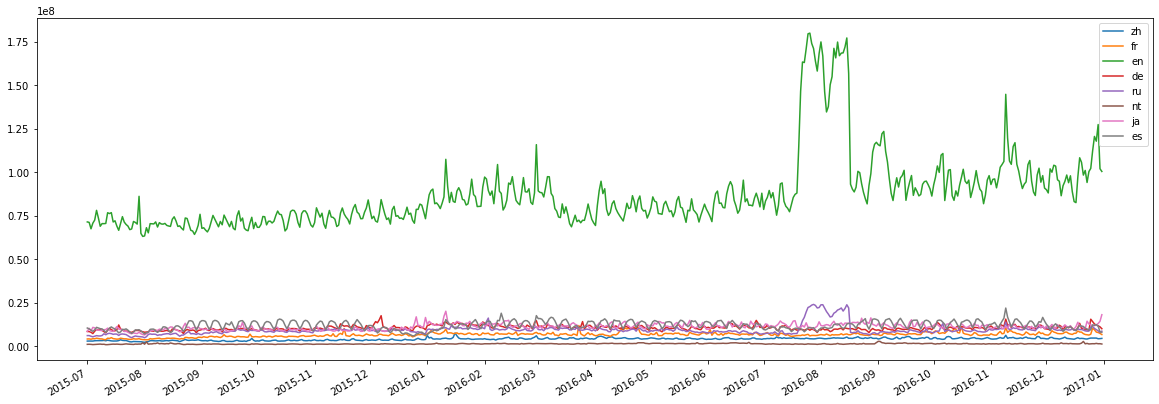

In [90]:
ax = df_domains.plot(x_compat=True,figsize=(20,7))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()